# Handwritten Digit Recognition using MNIST dataset

#### (I) Steps followed for processing and digit recognition:
1. MNIST dataset is taken from keras directly
2. These numerical digits are written by hand from 0 to 9.
3. Simple Neural network is built to recognising these numerical digits
4. Set of best hyperparameters is derived by performing grid search cross validation.

#### (II) Result:
1. Neural netowrk perfornamce = 97.27%
2. Hyperparameter tuning (using GridSearch) performance = 97.52%
3. Hyperparameter tuning + Dropout layers performance = 97.81%

***There was not much of improvement as compared to 1st model hence keeping 1st model for prediction***

#### (III) Future Tasks:
1. Using CNN to improve the accuracy
2. Compare the performance of NN and CNN

In [21]:
# Importing issential libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# loading mnist dataset from keras
mnist = tf.keras.datasets.mnist
data = mnist.load_data()

In [3]:
# Checking shape of the images
data[0][0].shape # 60000 for training, each of size 28X28

(60000, 28, 28)

In [4]:
# data is a tuple of train and test, hence spliting the data into X and y
(x_train, y_train),(x_test, y_test) = data

In [5]:
# The images are stored in RGB format hence the pixel values are in 0-255 scale 
np.argmax(x_train[0]), np.argmin(x_train[0])

(161, 0)

In [6]:
# Bringing pixel values from 0-255 into 0-1 scale i.e. Normalizing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
### Test 1 : using Artificial Neural Network

In [8]:
# Building a simple neural network
digi_detector_1 = Sequential()
digi_detector_1.add(tf.keras.layers.Flatten()) # each input image is flatten into 28X28=784 nodes
digi_detector_1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
digi_detector_1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
digi_detector_1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Softmax : for multiple catogorical classification
digi_detector_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
digi_detector_1.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2632 - accuracy: 0.9233
Epoch 2/3
60000/60000 [==============================] - 10s 175us/sample - loss: 0.1055 - accuracy: 0.9665
Epoch 3/3
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0738 - accuracy: 0.9767


In [9]:
predictions_1 = digi_detector_1.predict([x_test])

In [10]:
print("Predicted value :", np.argmax(predictions_1[100]))

Predicted value : 6


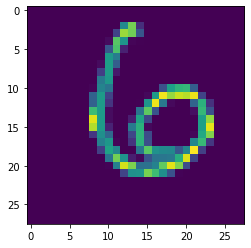

In [11]:
plt.imshow(x_test[100])
plt.show()

In [12]:
val_loss_1, val_acc_1 = digi_detector_1.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
print("Validation loss :", val_loss_1, " Validation accuracy :", val_acc_1)

Validation loss : 0.09120162910399958  Validation accuracy : 0.971


### Test 2 : using Hyper parameter

In [14]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(tf.keras.layers.Flatten()) # each input image is flatten into 28X28=784 nodes
        else:
            model.add(tf.keras.layers.Dense(nodes, activation))

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Softmax : for multiple catogorical classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
model_2 = KerasClassifier(create_model, verbose=0)

In [16]:
# Hyperparameter tuning to decide number of hidden layers 

#layers = [[128], [128,128], [40,20], [45,30,15]]
#activations = ['tf.nn.relu', 'tf.nn.leaky_relu', 'tf.nn.sigmoid']

#layers = [[128, 128], [40,20]]
#activations = ['tf.nn.relu', 'tf.nn.sigmoid']
#param_grid = dict(layers=layers, activation=activations, batch_size=[256, 1000], epochs=[30])
#grid = GridSearchCV(estimator=digi_detector, param_grid=param_grid, cv=5)

layers = [[256], [128, 128], [128, 256]]
activations = [tf.nn.relu]
param_grid = dict(layers=layers, activation=activations, batch_size=[500, 1000], epochs=[3,5,7])
grid = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=3)

In [17]:
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001ECC060B248>,
             iid='warn', n_jobs=None,
             param_grid={'activation': [<function relu at 0x000001EC9AACF318>],
                         'batch_size': [500, 1000], 'epochs': [3, 5, 7],
                         'layers': [[256], [128, 128], [128, 256]]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
grid.best_params_

{'activation': <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
 'batch_size': 500,
 'epochs': 7,
 'layers': [128, 256]}

In [19]:
grid.best_score_

0.9529500206311544

In [20]:
digi_detector_2 = Sequential()
digi_detector_2.add(tf.keras.layers.Flatten()) # each input image is flatten into 28X28=784 nodes
digi_detector_2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
digi_detector_2.add(Dropout(0.2))
digi_detector_2.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
digi_detector_2.add(Dropout(0.3))
digi_detector_2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Softmax : for multiple catogorical classification
digi_detector_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
digi_detector_2.fit(x_train, y_train, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3158 - accuracy: 0.9051
Epoch 2/7
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1441 - accuracy: 0.9564
Epoch 3/7
60000/60000 [==============================] - 10s 174us/sample - loss: 0.1099 - accuracy: 0.9663
Epoch 4/7
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0908 - accuracy: 0.9719
Epoch 5/7
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0800 - accuracy: 0.9740
Epoch 6/7
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0697 - accuracy: 0.9781
Epoch 7/7
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0619 - accuracy: 0.9798


In [21]:
predictions_2 = digi_detector_2.predict([x_test])

In [22]:
print("Predicted value :", np.argmax(predictions_2[100]))

Predicted value : 6


In [23]:
val_loss_2, val_acc_2 = digi_detector_2.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [27]:
print("Validation loss :", val_loss_2, " Validation accuracy :", val_acc_2)

Validation loss : 0.08355620586278383  Validation accuracy : 0.976


### Test 3 : using Hyper parameter and Dropout layer

In [28]:
digi_detector_3 = Sequential()
digi_detector_3.add(tf.keras.layers.Flatten()) # each input image is flatten into 28X28=784 nodes
digi_detector_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
digi_detector_3.add(Dropout(0.2))
digi_detector_3.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
digi_detector_3.add(Dropout(0.3))
digi_detector_3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Softmax : for multiple catogorical classification
digi_detector_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
digi_detector_3.fit(x_train, y_train, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 183us/sample - loss: 0.3194 - accuracy: 0.9035
Epoch 2/12
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1461 - accuracy: 0.9561
Epoch 3/12
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1130 - accuracy: 0.9651
Epoch 4/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0925 - accuracy: 0.9714
Epoch 5/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0798 - accuracy: 0.9747
Epoch 6/12
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0695 - accuracy: 0.9783
Epoch 7/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0646 - accuracy: 0.9794
Epoch 8/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0571 - accuracy: 0.9817
Epoch 9/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0533 - accuracy: 0.9827
Ep

In [29]:
predictions_3 = digi_detector_3.predict([x_test])

In [30]:
val_loss_3, val_acc_3 = digi_detector_3.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
# 3 result 
print("Validation loss :", val_loss_3, " Validation accuracy :", val_acc_3)

Validation loss : 0.0897882170663186  Validation accuracy : 0.9759


In [32]:
# 2 result
print("Validation loss :", val_loss_2, " Validation accuracy :", val_acc_2)

Validation loss : 0.08355620586278383  Validation accuracy : 0.976


In [35]:
# 1 result
print("Validation loss :", val_loss_1, " Validation accuracy :", val_acc_1)

Validation loss : 0.09120162910399958  Validation accuracy : 0.971


#### There is not much ofimprovement in the result even after increasing the layers and dropouts
#### Hence keeping the initial model digi_detector_1

### Using CNN for imagerecognition

- Performance of CNN for Image recognition checked here
- CNN performs better compared to ANN due to its ability to process images. 
- ANN has to flatten the image matrix before using which does not consider the image characteristics

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [18]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(X_train[:10000], y_train[:10000], batch_size=64, epochs=5)

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 55s 6ms/sample - loss: 0.5775 - accuracy: 0.8231
Epoch 2/5
10000/10000 [==============================] - 50s 5ms/sample - loss: 0.1580 - accuracy: 0.9546
Epoch 3/5
10000/10000 [==============================] - 49s 5ms/sample - loss: 0.1076 - accuracy: 0.9684
Epoch 4/5
10000/10000 [==============================] - 52s 5ms/sample - loss: 0.0791 - accuracy: 0.9749
Epoch 5/5
10000/10000 [==============================] - 52s 5ms/sample - loss: 0.0624 - accuracy: 0.9816


In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss 0.07183926073648035
Test accuracy 0.9774


NameError: name 'np' is not defined

In [23]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))

7


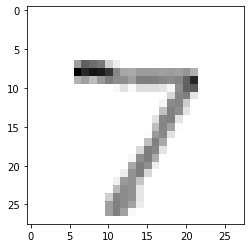

In [22]:
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()